# A (brief) introduction to pandas: a python library for data wrangling
## Or---pandas for MATLAB users

In [1]:
# Setup --- import the necessary libraries
import pandas as pd # this is pandas
import numpy as np # numpy does math
from matplotlib import pyplot as plt # this is for plotting
from datetime import datetime # this is for dealing with dates
from pandas.tools.plotting import scatter_matrix # this is for feature-feature relationships

# this forces plots inline in the notebook
%matplotlib inline 

# this uses matplotlib's seaborn style because it's pretty and basic matplotlib is ugly
plt.style.use('seaborn-deep')

# Suppressing a warning that is not relevant to this talk
pd.options.mode.chained_assignment = None

# Reading data from a csv

Pandas has a built-in method for reading csv files, called ```read_csv()```. This assumes that the fields are comma separated, but we can force the sep to any character. Pandas can read an enormous number of files, including Excel, SQL, JSON, from the clipboard, HDF5, pickles, Stata, SAS, and even HTML files. You can also create pandas objects from python objects. Most powerfully for python programmers, you can turn a python dict into a pandas dataframe. We'll come back to this.

We'll be examining a dataset that contains stock price data from the 5 large capitilization companies on the S&P 500 from 1JAN2015 to 22AUG2016. The data includes daily measurements including price high, low, close price, volume, and adjusted closing price (includes dividend yields).

In [2]:
stock_data = pd.read_csv("/Users/award/python_club/stock_prices.csv")

In [3]:
# look at the first 5 rows
stock_data.head()

# this code would return the same thing: stock_data[:5]

,Date,Open,High,Low,Close,Volume,Adj Close,Company
0,2015-01-02,532.599976,535.799988,527.880005,529.549988,1324000,529.549988,Google
1,2015-01-05,527.150024,527.989990,517.750000,519.460022,2059100,519.460022,Google
2,2015-01-06,520.500000,521.210022,505.549988,506.640015,2722800,506.640015,Google
3,2015-01-07,510.950012,511.489990,503.649994,505.149994,2345900,505.149994,Google
4,2015-01-08,501.510010,507.500000,495.019989,506.910004,3652700,506.910004,Google


This is called a pandas *dataframe*, and is the core way that pandas aggregates data. You'll note that the first 5 lines are all Google stock data. Finally, we can see that the rows are indexed by a numerical index. Unlike MATLAB, python uses a 0 index. 

# Slicing a pandas dataframe

To get the names of all the columns, simply call the columns method on your dataframe.

In [6]:
stock_data.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Adj Close',
       'Company'],
      dtype='object')

In [7]:
# We can access a column from a dataframe by indexing the name of the column
stock_data['Company']

# For you MATLAB people, python uses square brackets to index

0                    Google
1                    Google
2                    Google
3                    Google
4                    Google
5                    Google
6                    Google
7                    Google
8                    Google
9                    Google
10                   Google
11                   Google
12                   Google
13                   Google
14                   Google
15                   Google
16                   Google
17                   Google
18                   Google
19                   Google
20                   Google
21                   Google
22                   Google
23                   Google
24                   Google
25                   Google
26                   Google
27                   Google
28                   Google
29                   Google
               ...         
2035    Johnson and Johnson
2036    Johnson and Johnson
2037    Johnson and Johnson
2038    Johnson and Johnson
2039    Johnson and 

To index multiple columns, just pass a list of columns into the indexer. Confusingly, square brackets are also how you denote a list in python. Finally, you can index rows as a final step. Also in square brackets. Here, I'm going to look at 10 rows of open and close data, starting at index 150.

In [8]:
stock_data[['Open','Close']][150:160]

,Open,Close
150,667.780029,664.390015
151,667.090027,663.140015
152,699.580017,690.299988
153,694.489990,691.469971
154,689.200012,686.510010
155,684.039978,689.369995
156,688.039978,694.109985
157,691.070007,688.729980
158,690.109985,694.039978
159,689.099976,679.479980


We can also filter the dataset to get rows that meet some criteria

In [9]:
stock_data[(stock_data['Open'] < 150) & (stock_data['Volume'] % 2 == 0) & (~stock_data['Company'].str.contains('oft'))]
# selects rows where open price is less than 150, volume is even, and company does not include the string "oft"

,Date,Open,High,Low,Close,Volume,Adj Close,Company
826,2015-01-02,92.250000,93.050003,91.809998,92.830002,10220400,87.456842,ExxonMobil
827,2015-01-05,92.099998,92.400002,89.500000,90.290001,18502400,85.063861,ExxonMobil
828,2015-01-06,90.239998,91.410004,89.019997,89.809998,16670700,84.611641,ExxonMobil
829,2015-01-07,90.650002,91.480003,90.000000,90.720001,13590700,85.468972,ExxonMobil
830,2015-01-08,91.250000,92.269997,91.000000,92.230003,15487500,86.891573,ExxonMobil
831,2015-01-09,92.300003,92.779999,91.370003,92.099998,14488400,86.769093,ExxonMobil
832,2015-01-12,91.239998,91.339996,89.820000,90.330002,15176300,85.101547,ExxonMobil
833,2015-01-13,90.879997,91.430000,89.110001,90.000000,17469000,84.790646,ExxonMobil
834,2015-01-14,88.949997,89.889999,87.260002,89.739998,23272100,84.545693,ExxonMobil
835,2015-01-15,89.739998,90.660004,88.510002,88.959999,18759600,83.810842,ExxonMobil


Let's also look at all the unique values in the Company column

In [10]:
# set returns a generator that consists of *unordered* unique observations
companies = set(stock_data['Company'])
companies

{'ExxonMobil', 'Google', 'Johnson and Johnson', 'Microsoft', 'WellsFargo'}

# Indexing data
Some of pandas power comes from the way that you can index data. In our dataset, we have data from 5 different companies in a vertical format. In this way, each day is also represented 5 different times---one for each company. Pandas allows us to *index* our data based on this. We'll explore a few cool ways to index our data.

First, we can index our data based on company---essentially, we'll group the data into 5 blocks.

In [11]:
stock_data.set_index('Company',inplace=True)

stock_data.ix['ExxonMobil'].head()

,Date,Open,High,Low,Close,Volume,Adj Close
Company,,,,,,,
ExxonMobil,2015-01-02,92.250000,93.050003,91.809998,92.830002,10220400,87.456842
ExxonMobil,2015-01-05,92.099998,92.400002,89.500000,90.290001,18502400,85.063861
ExxonMobil,2015-01-06,90.239998,91.410004,89.019997,89.809998,16670700,84.611641
ExxonMobil,2015-01-07,90.650002,91.480003,90.000000,90.720001,13590700,85.468972
ExxonMobil,2015-01-08,91.250000,92.269997,91.000000,92.230003,15487500,86.891573


This lets us easily only look at Exxon data---or any other company. We only have 5 companies here, so it doesn't seem super useful, but as the complexity of the dataset grows, this is an _incredibly_ useful feature. It works as a functionally simple way to subset your data in an intuitive and powerful way.

We can also reset the index to the original indexer numbers. Next, we'll set the index to date.

In [12]:
stock_data.reset_index(level=0,inplace=True)
stock_data.head()

,Company,Date,Open,High,Low,Close,Volume,Adj Close
0,Google,2015-01-02,532.599976,535.799988,527.880005,529.549988,1324000,529.549988
1,Google,2015-01-05,527.150024,527.989990,517.750000,519.460022,2059100,519.460022
2,Google,2015-01-06,520.500000,521.210022,505.549988,506.640015,2722800,506.640015
3,Google,2015-01-07,510.950012,511.489990,503.649994,505.149994,2345900,505.149994
4,Google,2015-01-08,501.510010,507.500000,495.019989,506.910004,3652700,506.910004


In [13]:
stock_data['Date'] = pd.to_datetime(stock_data['Date'])
stock_data.set_index('Date', inplace=True)
stock_data.loc['2016-08-01':'2016-08-02']

,Company,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,,
2016-08-01,Google,786.669983,807.489990,785.039978,800.940002,3029700,800.940002
2016-08-02,Google,797.330017,802.320007,794.530029,800.119995,1996400,800.119995
2016-08-01,Microsoft,56.599998,56.750000,56.139999,56.580002,26003400,56.229542
2016-08-02,Microsoft,56.849998,56.900002,56.310001,56.580002,35122000,56.229542
2016-08-01,ExxonMobil,88.080002,88.150002,85.589996,85.860001,22908400,85.134015
2016-08-02,ExxonMobil,86.449997,87.320000,85.580002,87.040001,18919200,86.304038
2016-08-01,WellsFargo,47.980000,48.049999,47.630001,47.810001,16026600,47.429125
2016-08-02,WellsFargo,47.660000,47.830002,47.389999,47.700001,17033100,47.320001
2016-08-01,Johnson and Johnson,125.309998,125.709999,125.099998,125.400002,4615100,124.568988


With the index as a date, it's really easy to grab all the values that fall between certain dates. Here, I've printed everything from August 1 and 2 of 2016---and all I had to do was specify the date range that I care about. Then, I could perform whatever other operations I wanted.

In [14]:
# For example, get the sum of each column during this period
stock_data.loc['2016-08-01':'2016-08-02']['Volume'].sum()

Company      GoogleGoogleMicrosoftMicrosoftExxonMobilExxonM...
Open                                                   2218.58
High                                                   2246.42
Low                                                    2207.79
Close                                                  2232.88
Volume                                               152812600
Adj Close                                               2228.3
dtype: object

# Groupby and plotting
Now that we have indexed our dataframe with datetime, plotting becomes very easy. We can look at our stock prices over time and all sorts of other fun stuff. This leverages a great pandas function ```groupby``` which makes split-apply-combine super fun!

In [39]:
grouped = stock_data.groupby('Company')
# Get the groups --- this returns a dict with the group as key and as value a list of all the indices inside that group
grouped.groups

{'ExxonMobil': [Timestamp('2015-01-02 00:00:00'),
  Timestamp('2015-01-05 00:00:00'),
  Timestamp('2015-01-06 00:00:00'),
  Timestamp('2015-01-07 00:00:00'),
  Timestamp('2015-01-08 00:00:00'),
  Timestamp('2015-01-09 00:00:00'),
  Timestamp('2015-01-12 00:00:00'),
  Timestamp('2015-01-13 00:00:00'),
  Timestamp('2015-01-14 00:00:00'),
  Timestamp('2015-01-15 00:00:00'),
  Timestamp('2015-01-16 00:00:00'),
  Timestamp('2015-01-20 00:00:00'),
  Timestamp('2015-01-21 00:00:00'),
  Timestamp('2015-01-22 00:00:00'),
  Timestamp('2015-01-23 00:00:00'),
  Timestamp('2015-01-26 00:00:00'),
  Timestamp('2015-01-27 00:00:00'),
  Timestamp('2015-01-28 00:00:00'),
  Timestamp('2015-01-29 00:00:00'),
  Timestamp('2015-01-30 00:00:00'),
  Timestamp('2015-02-02 00:00:00'),
  Timestamp('2015-02-03 00:00:00'),
  Timestamp('2015-02-04 00:00:00'),
  Timestamp('2015-02-05 00:00:00'),
  Timestamp('2015-02-06 00:00:00'),
  Timestamp('2015-02-09 00:00:00'),
  Timestamp('2015-02-10 00:00:00'),
  Timestamp('2

In [58]:
# Get the means per group per column
grouped.mean()

,Open,High,Low,Close,Volume,Adj Close,PriceDiff,PriceDiffPercent
Company,,,,,,,,
ExxonMobil,83.941283,84.631429,83.231041,83.983680,13812340,81.403332,0.001294,0.000016
Google,667.923777,673.714843,661.501259,667.799999,2143447,667.799999,0.649029,0.000972
Johnson and Johnson,104.473802,105.116368,103.796489,104.516126,8139549,101.844286,0.047880,0.000470
Microsoft,49.099395,49.576998,48.666441,49.151380,35060021,47.993263,0.031713,0.000661
WellsFargo,52.408547,52.784601,52.000363,52.400073,17263596,50.994681,-0.008256,-0.000162


In [41]:
# Easily grab a group
grouped.get_group('Johnson and Johnson').head()

,Company,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,,
2015-01-02,Johnson and Johnson,105.050003,105.550003,104.129997,104.519997,5753600,99.403504
2015-01-05,Johnson and Johnson,104.480003,104.730003,103.680000,103.790001,8079300,98.709244
2015-01-06,Johnson and Johnson,104.339996,104.989998,102.940002,103.279999,7428000,98.224207
2015-01-07,Johnson and Johnson,103.910004,105.830002,103.809998,105.559998,7931700,100.392595
2015-01-08,Johnson and Johnson,106.059998,106.489998,105.750000,106.389999,9916000,101.181966


In [42]:
# And get the medians of that group
grouped.get_group('Johnson and Johnson').median()

Open         1.017100e+02
High         1.023700e+02
Low          1.009500e+02
Close        1.018300e+02
Volume       7.674700e+06
Adj Close    9.822421e+01
dtype: float64

In [63]:
# We can also apply multiple functions on a column at the same time
grouped['Close'].agg({'Mean' : np.mean, 'Variance' : np.var})

,Mean,Variance
Company,,
ExxonMobil,83.983680,32.336321
Google,667.799999,8559.421455
Johnson and Johnson,104.516126,67.081932
Microsoft,49.151380,22.998460
WellsFargo,52.400073,11.797622


In [64]:
# And the mother of all info functions, describe
grouped.describe()

Open        High         Low       Close  \
Company                                                                     
ExxonMobil          count  413.000000  413.000000  413.000000  413.000000   
                    mean    83.941283   84.631429   83.231041   83.983680   
                    std      5.716147    5.559839    5.790482    5.686503   
                    min     67.989998   71.379997   66.550003   68.709999   
                    25%     79.980003   80.900002   79.120003   80.080002   
                    50%     84.430000   84.930000   83.860001   84.410004   
                    75%     88.400002   88.779999   87.620003   88.400002   
                    max     95.440002   95.550003   94.639999   95.120003   
Google              count  413.000000  413.000000  413.000000  413.000000   
                    mean   667.923777  673.714843  661.501259  667.799999   
                    std     92.627907   93.204527   91.719087   92.517141   
                    min    499.239990  500.279999  490.910004  497.059998   
                    25%    558.479980  562.450012  554.409973  557.609985   
                    50%    694.489990  704.520020  688.500000  699.619995   
                    75%    746.099976  753.000000  736.700012  747.739990   
                    max    810.469971  813.880005  806.489990  808.489990   
Johnson and Johnson count  413.000000  413.000000  413.000000  413.000000   
                    mean   104.473802  105.116368  103.796489  104.516126   
                    std      8.170436    8.093194    8.304199    8.190356   
                    min     90.699997   91.879997   81.790001   90.730003   
                    25%     99.760002  100.209999   99.089996   99.730003   
                    50%    101.709999  102.370003  100.949997  101.830002   
                    75%    108.220001  108.900002  107.739998  108.309998   
                    max    125.839996  126.070000  125.099998  125.400002   
Microsoft           count  413.000000  413.000000  413.000000  413.000000   
                    mean    49.099395   49.576998   48.666441   49.151380   
                    std      4.793193    4.792201    4.771229    4.795671   
                    min     40.340000   40.740002   39.720001   40.290001   
                    25%     45.349998   45.889999   45.029999   45.480000   
                    50%     49.020000   49.570000   48.599998   49.410000   
                    75%     53.169998   53.900002   52.790001   53.240002   
                    max     58.169998   58.500000   58.029999   58.299999   
WellsFargo          count  413.000000  413.000000  413.000000  413.000000   
                    mean    52.408547   52.784601   52.000363   52.400073   
                    std      3.445379    3.408335    3.479325    3.434767   
                    min     44.930000   45.330002   44.500000   45.009998   
                    25%     49.020000   49.320000   48.610001   48.939999   
                    50%     53.009998   53.360001   52.450001   52.880001   
                    75%     55.299999   55.580002   54.970001   55.340000   
                    max     58.730000   58.770000   58.070000   58.520000   

                                 Volume   Adj Close   PriceDiff  \
Company                                                           
ExxonMobil          count  4.130000e+02  413.000000  412.000000   
                    mean   1.381234e+07   81.403332    0.001294   
                    std    5.059166e+06    5.782109    1.070204   
                    min    4.156600e+06   66.374913   -3.636832   
                    25%    1.003790e+07   77.915943   -0.598233   
                    50%    1.295290e+07   81.248483   -0.009835   
                    75%    1.607050e+07   85.685655    0.585890   
                    max    3.608350e+07   94.315720    3.790564   
Google              count  4.130000e+02  413.000000  412.000000   
                    mean   2.143447e+06  667.799999    0.6490

### Plotting a grouped object is really, really simple

Company
ExxonMobil             Axes(0.125,0.2;0.775x0.7)
Google                 Axes(0.125,0.2;0.775x0.7)
Johnson and Johnson    Axes(0.125,0.2;0.775x0.7)
Microsoft              Axes(0.125,0.2;0.775x0.7)
WellsFargo             Axes(0.125,0.2;0.775x0.7)
Name: Volume, dtype: object

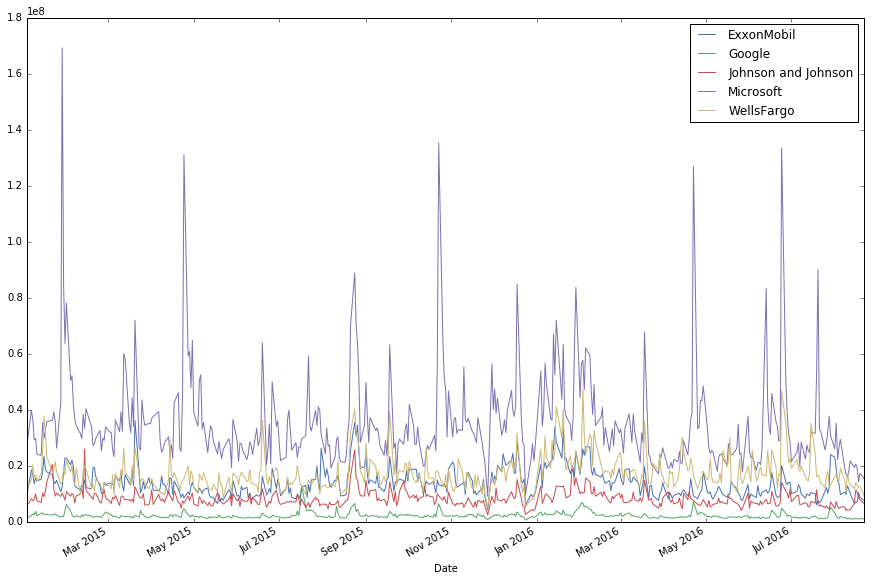

In [43]:
grouped['Volume'].plot(figsize = (15,10), legend=True)

# Calculating cool stuff with pandas
Pandas also makes it very easy to do things like calculate moving averages, difference between observations, observation counts, etc. Here, I'll look to see if we can find days where there were very large changes in prices.

In [44]:
# Calculate the difference in closing price by company, and add it as a new column in the dataframe
stock_data['PriceDiff'] = stock_data.groupby('Company')['Adj Close'].transform(lambda x: x.diff())

# See the new column? So exciting!
stock_data.head()

,Company,Open,High,Low,Close,Volume,Adj Close,PriceDiff
Date,,,,,,,,
2015-01-02,Google,532.599976,535.799988,527.880005,529.549988,1324000,529.549988,NaN
2015-01-05,Google,527.150024,527.989990,517.750000,519.460022,2059100,519.460022,-10.089966
2015-01-06,Google,520.500000,521.210022,505.549988,506.640015,2722800,506.640015,-12.820007
2015-01-07,Google,510.950012,511.489990,503.649994,505.149994,2345900,505.149994,-1.490021
2015-01-08,Google,501.510010,507.500000,495.019989,506.910004,3652700,506.910004,1.760010


Note that the first value is NaN. We can't calculate a diff for the first value. Math done right!

##  Plotting the new information

Company
ExxonMobil             Axes(0.125,0.2;0.775x0.7)
Google                 Axes(0.125,0.2;0.775x0.7)
Johnson and Johnson    Axes(0.125,0.2;0.775x0.7)
Microsoft              Axes(0.125,0.2;0.775x0.7)
WellsFargo             Axes(0.125,0.2;0.775x0.7)
Name: PriceDiff, dtype: object

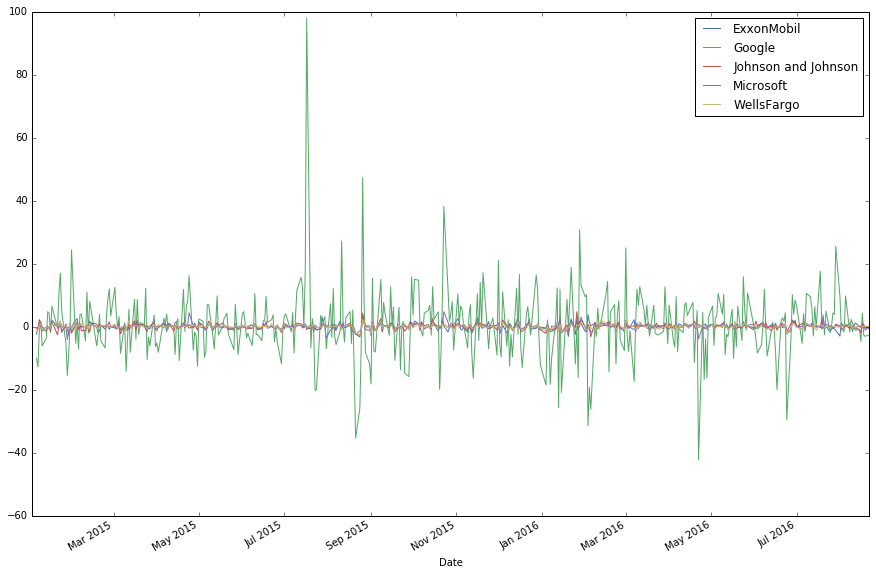

In [45]:
# Add the new columns to the groupby object
grouped = stock_data.groupby('Company')
grouped['PriceDiff'].plot(figsize = (15,10), legend=True)

Woah! Google's variance is way higher than everyone else's! Let's standardize these measurements, so we can see *relative* changes in price---maybe Google's stock price is just super high.

Company
ExxonMobil             Axes(0.125,0.2;0.775x0.7)
Google                 Axes(0.125,0.2;0.775x0.7)
Johnson and Johnson    Axes(0.125,0.2;0.775x0.7)
Microsoft              Axes(0.125,0.2;0.775x0.7)
WellsFargo             Axes(0.125,0.2;0.775x0.7)
Name: PriceDiffPercent, dtype: object

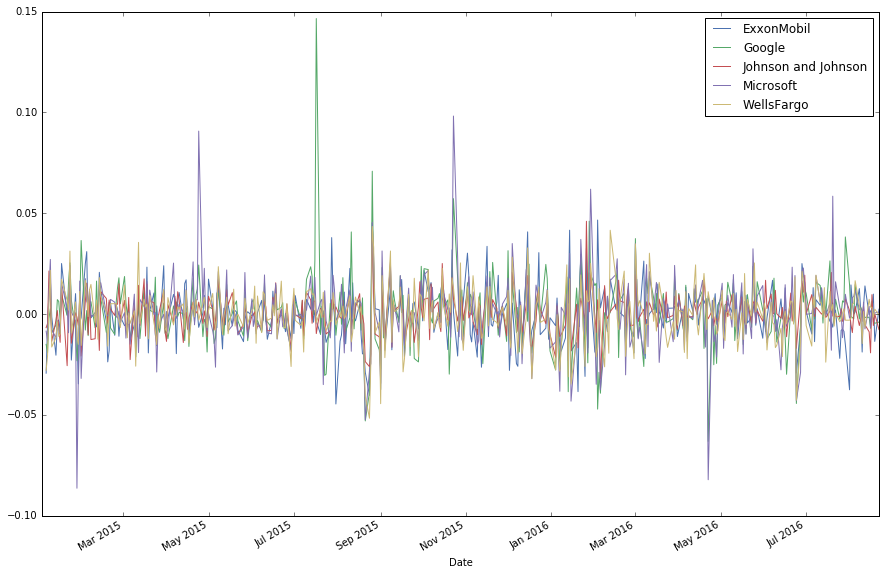

In [46]:
normed_diff = lambda x: x.diff() / x.mean()
stock_data['PriceDiffPercent'] = stock_data.groupby('Company')['Adj Close'].transform(normed_diff)
grouped = stock_data.groupby('Company')
grouped['PriceDiffPercent'].plot(figsize = (15,10), legend=True)

Busy! Let's only look at July 2016.

Company
ExxonMobil             Axes(0.125,0.2;0.775x0.7)
Google                 Axes(0.125,0.2;0.775x0.7)
Johnson and Johnson    Axes(0.125,0.2;0.775x0.7)
Microsoft              Axes(0.125,0.2;0.775x0.7)
WellsFargo             Axes(0.125,0.2;0.775x0.7)
Name: PriceDiffPercent, dtype: object

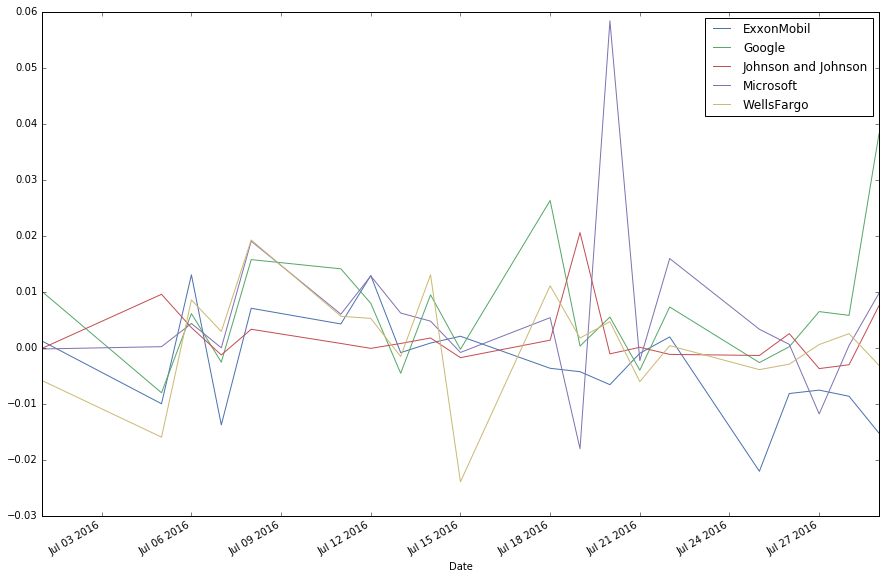

In [47]:
grouped_julyOnly = stock_data.loc['2016-07-01':'2016-07-31'].groupby('Company')
grouped_julyOnly['PriceDiffPercent'].plot(figsize = (15,10),legend=True)

# Saving data with pandas

Now that we've calculated a few new columns, we can save our data so that we don't lose anything. Pandas makes writing files super easy! The simplest method is the ```to_csv()``` method. Pandas can save data to all the formats that it reads data from, so you can save out your data in whatever your favorite container is!

In [48]:
stock_data.to_csv("/Users/award/python_club/stock_data_with_calcs.csv")

# Data science things!

Pandas is also very useful for basic data exploration. Although it's difficult to specify extremely complex statistical models in python (e.g. mixed effects models), python is a powerful engine to examine basic correlations.

Let's dive into our Google data.

In [49]:
# Get google only
google = stock_data[stock_data['Company'].str.contains('Google')]

# We could also do this
google = grouped.get_group('Google')

google.tail()

,Company,Open,High,Low,Close,Volume,Adj Close,PriceDiff,PriceDiffPercent
Date,,,,,,,,,
2016-08-16,Google,803.500000,804.260010,797.000000,801.190002,1056700,801.190002,-4.770020,-0.007143
2016-08-17,Google,800.000000,805.630005,796.299988,805.419983,1064500,805.419983,4.229981,0.006334
2016-08-18,Google,805.359985,808.000000,801.630005,802.750000,864600,802.750000,-2.669983,-0.003998
2016-08-19,Google,799.789978,801.229980,796.880005,799.650024,1094400,799.650024,-3.099976,-0.004642
2016-08-22,Google,798.510010,799.299988,794.330017,796.950012,852800,796.950012,-2.700012,-0.004043


Let's look at the correlation matrix!

In [50]:
google.corr()

,Open,High,Low,Close,Volume,Adj Close,PriceDiff,PriceDiffPercent
Open,1.000000,0.998583,0.997889,0.996270,0.004584,0.996270,-0.001154,-0.001154
High,0.998583,1.000000,0.997675,0.998039,0.025160,0.998039,0.023616,0.023616
Low,0.997889,0.997675,1.000000,0.998451,-0.020714,0.998451,0.028069,0.028069
Close,0.996270,0.998039,0.998451,1.000000,-0.001771,1.000000,0.055930,0.055930
Volume,0.004584,0.025160,-0.020714,-0.001771,1.000000,-0.001771,0.164390,0.164390
Adj Close,0.996270,0.998039,0.998451,1.000000,-0.001771,1.000000,0.055930,0.055930
PriceDiff,-0.001154,0.023616,0.028069,0.055930,0.164390,0.055930,1.000000,1.000000
PriceDiffPercent,-0.001154,0.023616,0.028069,0.055930,0.164390,0.055930,1.000000,1.000000


Thankfully, we see that PriceDiff and PriceDiffPercent are perfectly collinear. Which they should be, since PriceDiffPercent is simply a linear transform of PriceDiff. Since they're the same, let's drop PriceDiff from the dataframe. Adjusted close and close are also perfectly collinear, which means that Google apparently did not announce any dividends after close. So, we'll go ahead and drop that, too.

In [51]:
google.drop(['PriceDiff', 'Adj Close'], axis=1, inplace=True)
google.columns

Index(['Company', 'Open', 'High', 'Low', 'Close', 'Volume',
       'PriceDiffPercent'],
      dtype='object')

Great---now let's look at the correlation scatter plots. I'll also plot the kernel density estimate of the data down the diagonal.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x119efeda0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x11b22d160>]], dtype=object)

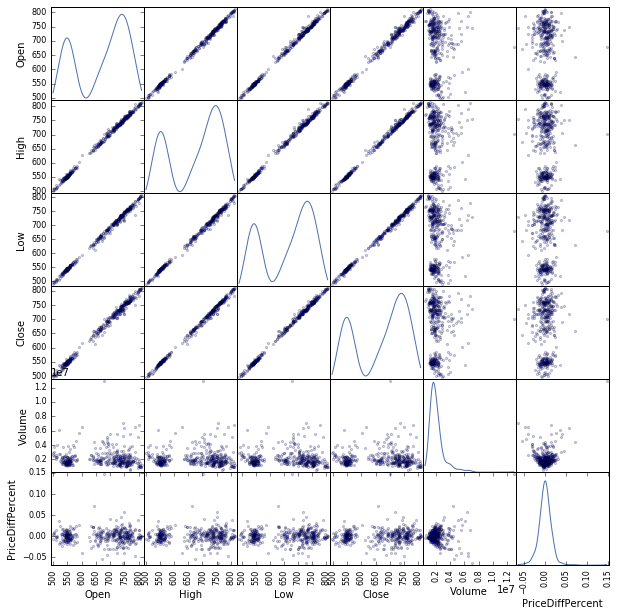

In [52]:
scatter_matrix(google, alpha=0.2, figsize=(10,10), diagonal='kde')

Cool! Again, unsurprisingly, the daily highs, lows, opens, and closes are all gightly related. Volume and price difference seem to be largely independent of one aonther. What if we instead looked at closing prices for all of our stocks?

In [53]:
unindexed = stock_data.reset_index(level=0)
wide_data = unindexed.pivot(index='Date', columns='Company', values='Adj Close')
wide_data.head()

Company,ExxonMobil,Google,Johnson and Johnson,Microsoft,WellsFargo
Date,,,,,
2015-01-02,87.456842,529.549988,99.403504,44.604322,52.031401
2015-01-05,85.063861,519.460022,98.709244,44.194149,50.604580
2015-01-06,84.611641,506.640015,98.224207,43.545497,49.548732
2015-01-07,85.468972,505.149994,100.392595,44.098757,49.843610
2015-01-08,86.891573,506.910004,101.181966,45.396060,50.947018


In [54]:
wide_data.corr()

Company,ExxonMobil,Google,Johnson and Johnson,Microsoft,WellsFargo
Company,,,,,
ExxonMobil,1.000000,0.023364,0.756522,0.274117,-0.339932
Google,0.023364,1.000000,0.576059,0.883986,-0.420218
Johnson and Johnson,0.756522,0.576059,1.000000,0.703854,-0.581465
Microsoft,0.274117,0.883986,0.703854,1.000000,-0.411840
WellsFargo,-0.339932,-0.420218,-0.581465,-0.411840,1.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11fb84320>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x1205d1438>]], dtype=object)

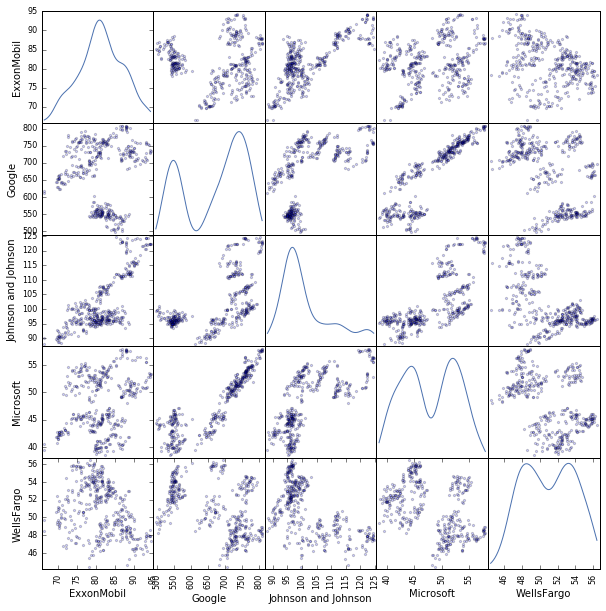

In [55]:
scatter_matrix(wide_data, alpha=0.2, figsize=(10,10), diagonal='kde')

Hmm. Not much there. Let's grab some more data, append it, and try again!

# Appending 

In [75]:
# Load citibank data
c = pd.read_csv("/Users/award/python_club/c.csv")

c.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Adj Close'], dtype='object')

We can see that this dataframe doesn't have a 'Company' column. We also don't have our calculated columns. We'll add the company column, but not the others.

In [80]:
c['Company'] = 'Citibank'
c['Date'] = pd.to_datetime(c['Date'])

Now, let's append this dataframe to our other dataframe!

In [81]:
unindexed = unindexed.append(c)
unindexed.tail()

,Adj Close,Close,Company,Date,High,Low,Open,PriceDiff,PriceDiffPercent,Volume
156,46.619999,46.619999,Citibank,2016-08-16 00:00:00,46.790001,46.139999,46.250000,NaN,NaN,15202100
157,46.630001,46.630001,Citibank,2016-08-17 00:00:00,46.799999,46.380001,46.509998,NaN,NaN,17899300
158,46.500000,46.500000,Citibank,2016-08-18 00:00:00,46.700001,46.209999,46.570000,NaN,NaN,14190300
159,46.529999,46.529999,Citibank,2016-08-19 00:00:00,46.590000,46.020000,46.340000,NaN,NaN,12207600
160,46.660000,46.660000,Citibank,2016-08-22 00:00:00,46.750000,46.250000,46.419998,NaN,NaN,10982000


Notice that PriceDiff and PriceDiffPercent, our calculated columns which were empty in our dataframe c, are listed as NaN here. Smart append!

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x12254b160>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x123ad4ba8>]], dtype=object)

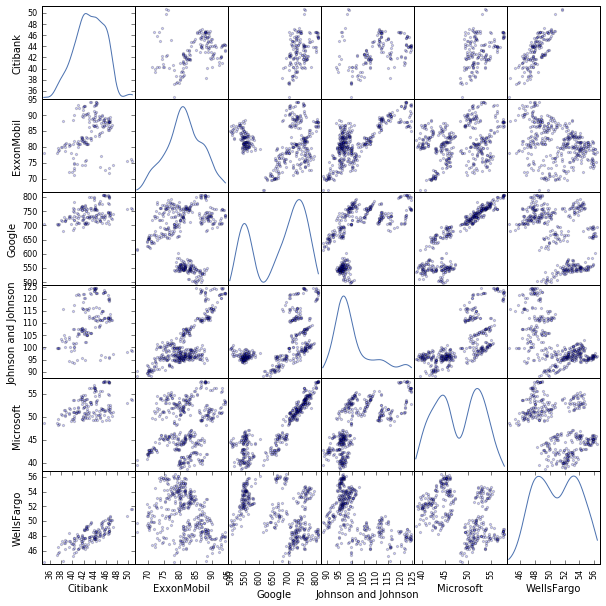

In [82]:
wide_data = unindexed.pivot(index='Date', columns='Company', values='Adj Close')
scatter_matrix(wide_data, alpha=0.2, figsize=(10,10), diagonal='kde')

# Summary

Pandas is an extremely powerful toolbox for manipulating data. In particular, the ability to index your data based on whatever you want makes slicing and dicing extremely easy. Further, the power of groupby to do split-apply-combine operations makes pandas incredibly flexible for data wrangling.

Feel free to reach out with any questions: award@proteus.com; @award on slack